<a href="https://colab.research.google.com/github/arilvers/IntegrateCA/blob/main/DataManipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
library(readr)
library(lubridate)
library(dplyr)
library(tidyverse)
library(ggplot2)


In [51]:
fires <- read_csv("https://raw.githubusercontent.com/arilvers/IntegrateCA/main/forestfires.csv")

Rows: 517 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [52]:
str(fires)

spec_tbl_df [517 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X    : num [1:517] 7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : num [1:517] 5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr [1:517] "mar" "oct" "oct" "mar" ...
 $ day  : chr [1:517] "fri" "tue" "sat" "fri" ...
 $ FFMC : num [1:517] 86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num [1:517] 26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num [1:517] 94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num [1:517] 5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num [1:517] 8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : num [1:517] 51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num [1:517] 6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num [1:517] 0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num [1:517] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X = col_double(),
  ..   Y = col_double(),
  ..   month = col_character(),
  ..   day = col_character(),
  ..   FFMC = col_double(),
  ..   DMC = col_double(),
  ..   DC = col_double(

In [53]:
head(fires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [55]:
firesinmonths <- fires %>%  #Number of forest fires by month
  group_by(month) %>%
  summarise(count = n())

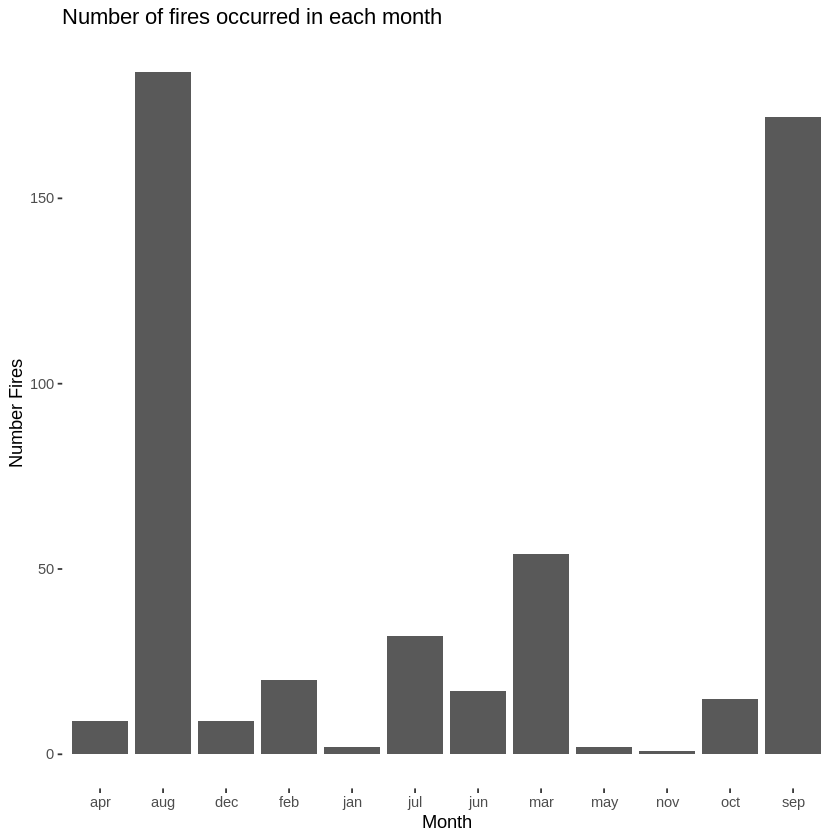

In [61]:
ggplot(firesinmonths) + 
  aes(x = month, y = count) +
  geom_bar(stat = "identity") + 
  labs(title = "Number of fires occurred in each month", x = "Month", y = "Number Fires") +
  theme(panel.background = element_rect(fill = "white"))


In [62]:
fireindays <- fires %>% #Number of fires by weekly
  group_by(day) %>%
  summarize(count_weekday = n())

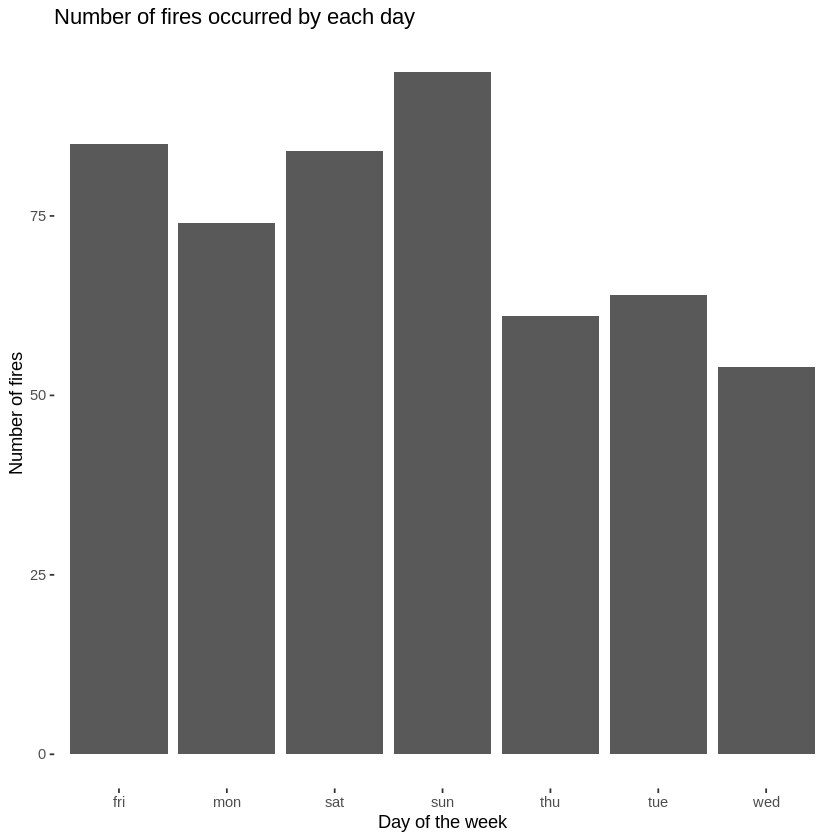

In [65]:
ggplot(fireindays) +
  aes(x = day, y = count_weekday) +
  geom_bar(stat = "identity") +
  labs(title = "Number of fires occurred by each day", x = "Day of the week", y = "Number of fires") +
  theme(panel.background = element_rect(fill = "white"))
